## INTRODUCTION:
   * Dataset of the IBM HR Analytics Employee Attrition & Performance has been reviewed for this Analytic Report.
   (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)
   * We will try to analyse visually the trends in how and why are quitting their jobs, by answer some following questions:
    1. What are key factors that are playing into current attrition rates? Is it because of monthly income level, or distance from home or performance ratings or Bad management or Excessive working hours?
    2. What are key factors that are playing into current satisfaction rates?
    3. When are employees leaving?
   * As an initial step, we evaluate data using visual analytics. We will use Numpy, Pandas, Matplotlib and Seaborn:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Reading .csv file with "pd.read_csv()". Then the data which is read by pd.read_csv() is stored in the "data" variable.
data = pd.read_csv("/home/thang/Desktop/MACHINE LEARNING_CBD ROBOTICS/WEEK 2/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()   #Display first few rows of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

In [4]:
data.info()   #Examining the data features of the dataset using the " .info() " method.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [79]:
data.groupby('Attrition').size()

Attrition
No     1233
Yes     237
dtype: int64

In [80]:
data['Attrition'].value_counts(normalize=True) * 100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

SUMMARY:
* Dataset Structure: 1470 rows, 35 features
* Missing Data: No missing data
* Data Type: int64 and object
* Imbalanced dataset: 1233 (84% of cases) no attrition and 237 (16% of cases) attrition

In [5]:
data.describe()  #Generate descriptive statistics that summarize the central tendency`

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 2. Data Visualizations Overview

## 2.1. Visulazing the distibution of the data for every feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbea6c6db90>,
      dtype=object)

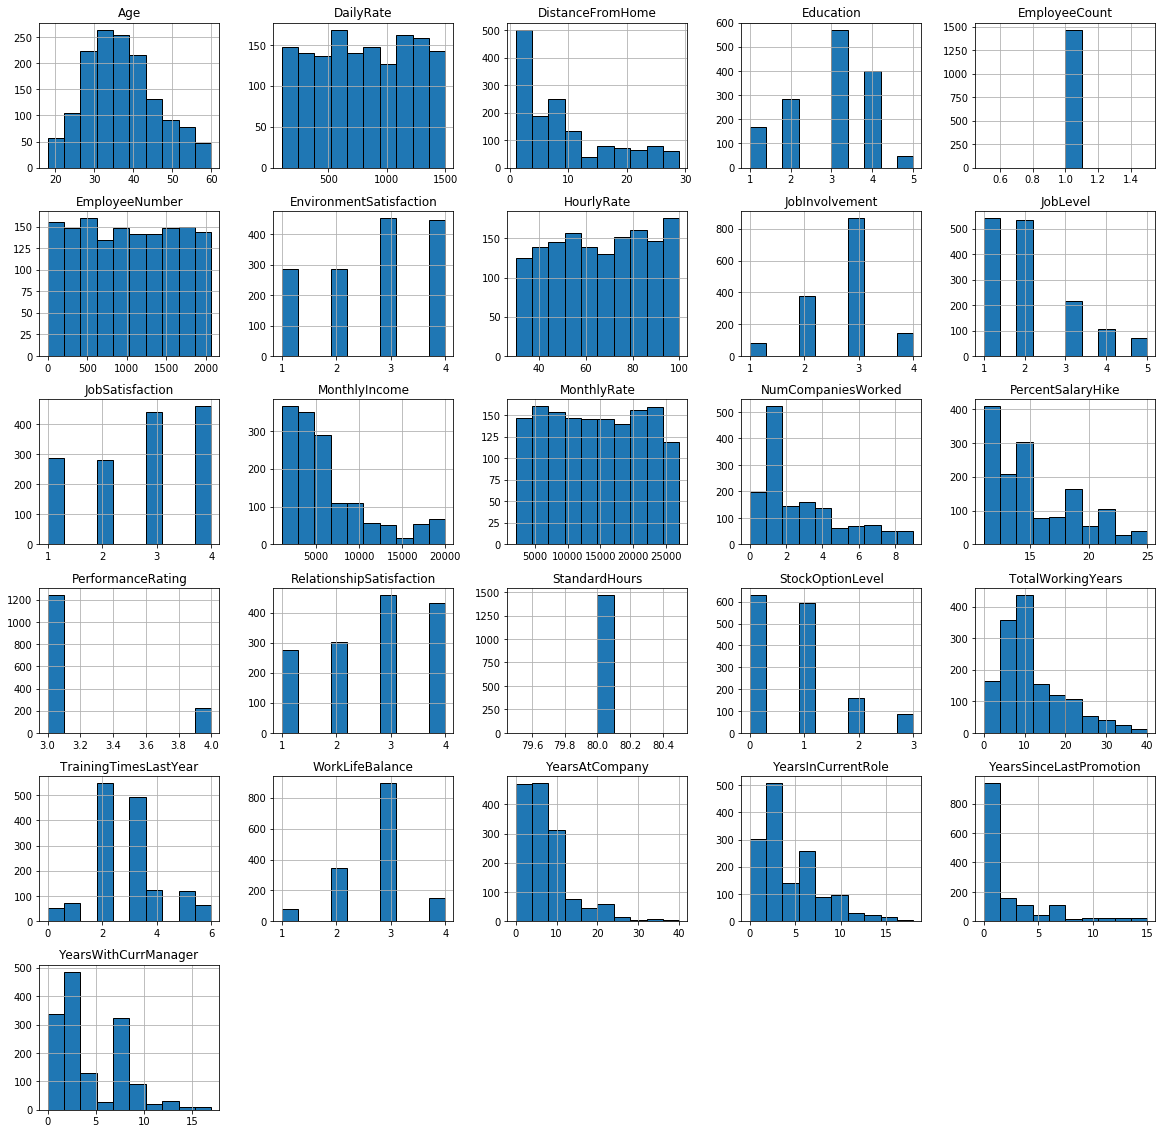

In [16]:
data.hist(edgecolor='black', linewidth=1, figsize=(20, 20))

## 2.2. Plot a correlation map for all numeric variables

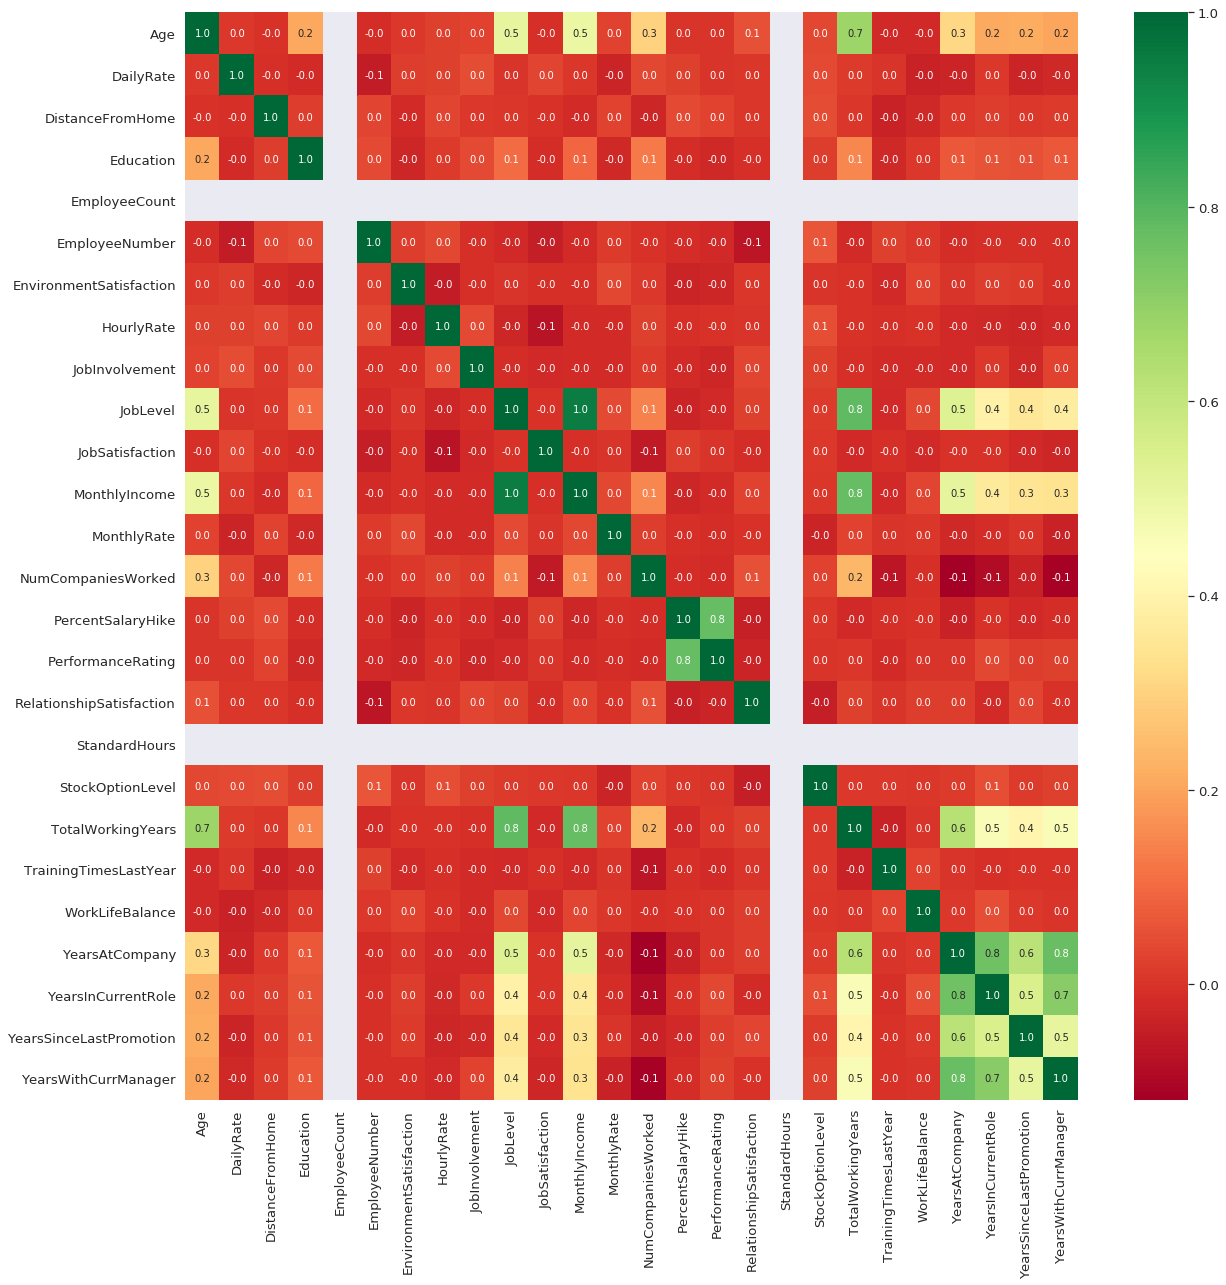

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn",fmt='.1f', annot_kws={"size":10})

Two variables are said to be highly correlation when they have a value of 0.7 or greater.
The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.

## 3. Transform

Treat categorical labels and change into numeric values (Especially: Attrition collumn)

In [204]:
data1 = data.copy

In [180]:
#Find and Replace method in replacing categorical to numerics values
obj_df['attrition'] = obj_df['attrition'].astype('category')
obj_df.dtypes

BusinessTravel    category
Department        category
EducationField    category
Gender            category
JobRole           category
MaritalStatus     category
Over18            category
OverTime          category
attrition         category
dtype: object

In [181]:
obj_df['Department'] = obj_df['Department'].astype('category')
obj_df['EducationField'] = obj_df['EducationField'].astype('category')
obj_df['Gender'] = obj_df['Gender'].astype('category')
obj_df['JobRole'] = obj_df['JobRole'].astype('category')
obj_df['MaritalStatus'] = obj_df['MaritalStatus'].astype('category')
obj_df['Over18'] = obj_df['Over18'].astype('category')
obj_df['OverTime'] = obj_df['OverTime'].astype('category')
obj_df['BusinessTravel'] = obj_df['BusinessTravel'].astype('category')

In [183]:
data['Department'] = obj_df['Department'].cat.codes
data['EducationField'] = obj_df['EducationField'].cat.codes
data['Gender'] = obj_df['Gender'].cat.codes
data['JobRole'] = obj_df['JobRole'].cat.codes
data['MaritalStatus'] = obj_df['MaritalStatus'].cat.codes
data['Over18'] = obj_df['Over18'].cat.codes
data['OverTime'] = obj_df['OverTime'].cat.codes
data['BusinessTravel'] = obj_df['BusinessTravel'].cat.codes
data['attrition'] = obj_df['attrition'].cat.codes
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,0


## 4. ANSWER 3 QUESTIONS

## Q1. What are key factors that are playing into current attrition rates?

##                     How EnvironmentSatisfaction impacts the attrition?

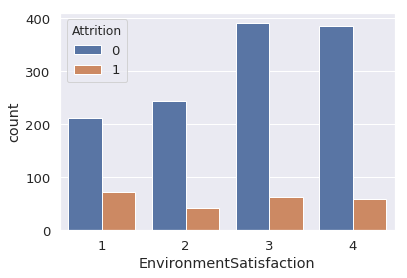

In [186]:
sns.countplot(x = data['EnvironmentSatisfaction'],hue=data['Attrition'] , data = data)

1. Identify
    Populations:
        Pop 1: All people who is attrition employees 
        Pop 2: All people who is not attrition employees     
    Distribution:
        Difference Between Means: Distribution of Difference Between Means
        Not Distribution of Mean Differ
    Test & Assumptions: 
        1. Data are interval
        2. Random selection
        3. Sample size of 1470 is more than 30, therefore distribution might be normal
        
2. State the null and research hypotheses
    * H0: Environment Satisfaction is not impact the attrition
    * H1: Environment Satisfaction impact the attrition

In [87]:
from scipy import stats

In [194]:
# Calculate the T-test 
stats.ttest_ind(data['EnvironmentSatisfaction'], data['Attrition']) 

Ttest_indResult(statistic=85.1217064799603, pvalue=0.0)

## -------> MAKE A DECISION:

t = 85.1217 > critical value  = 2.352
--> reject the null hypothesis
* More "Environment Satisfaction" more impact to the attrition rate:
Employees who stay are more satisfied with their work environment on average than those who leave.

## How MonthlyIncome impacts the attrition?

1. Identify
    Populations:
        Pop 1: All people who is attrition employees 
        Pop 2: All people who is not attrition employees     
    Distribution:
        Difference Between Means: Distribution of Difference Between Means
        Not Distribution of Mean Differ
    Test & Assumptions: 
        1. Data are interval
        2. Random selection
        3. Sample size of 1470 is more than 30, therefore distribution might be normal
        
2. State the null and research hypotheses
    * H0: Monthly Income is not impact the attrition
    * H1: Monthly Income impact the attrition

In [200]:
# Calculate the T-test 
stats.ttest_ind(data['MonthlyIncome'], data['Attrition']) 

Ttest_indResult(statistic=52.957149014398, pvalue=0.0)

## -------> MAKE A DECISION:

t = 52.957149014398 > critical value = 2.352 --> reject the null hypothesis

More "Monthly Income" more impact to the attrition rate

## Q2. What are key factors that are playing into current satisfaction rates?

## Q3. When are employees leaving?

The Impact of "Years At Company" & "Income" towards Attrition:

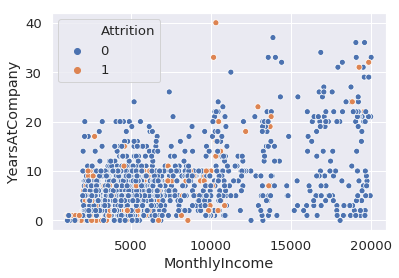

In [213]:
sns.scatterplot(x= data['MonthlyIncome'], y = data['YearsAtCompany'], hue = data['Attrition'])

## Employees who working at company for under 10 years and have Monthly Income under 10000, usually leave to looking for more challenges